<h1>Project Overview</h1>
<p>This project dives into how video game sales, ratings, and Twitch streaming trends connect by analyzing data from <strong>VGChartz</strong> (sales), <strong>Metacritic</strong> (critic scores), and <strong>Twitch</strong> (viewership stats).</p>

<h2>Goals</h2>
<ol>
    <li><strong>Total Sales</strong>: Combine regional sales across different platforms for each game to get a clear picture of its overall sales.</li>
    <li><strong>Scores vs. Sales</strong>: See if games with higher Metacritic scores tend to sell more.</li>
    <li><strong>Streaming Popularity vs. Sales</strong>: Explore if games popular on Twitch (high average viewers and hours watched) lead to higher sales.</li>
    <li><strong>COVID-19’s Impact</strong>: Look at how Twitch viewership surged during COVID-19, particularly for games like <em>Just Chatting</em>, <em>GTA V</em>, and <em>Fortnite</em>.</li>
</ol>

<h2>Data Sources</h2>
<ul>
    <li><strong>VGChartz</strong>: Provides game sales data by region and platform, plus overall totals.</li>
    <li><strong>Metacritic</strong>: Supplies critic scores to help assess if critical acclaim boosts sales.</li>
    <li><strong>Twitch Data</strong>: Shows metrics like hours watched and average viewers, allowing us to see which games have been Twitch hits.</li>
</ul>

<h2>Steps To Took</h2>
<ol>
    <li><strong>Cleaning Up</strong></li>
    <li><strong>Aggregating Sales</strong></li>
    <li><strong>Combining Datasets</strong></li>
</ol>

<h2>Key Visuals</h2>
<ul>
    <li><strong>Sales by Genre and Region</strong>: See which genres are most popular in different regions over the past 10 years.</li>
    <li><strong>Critic Scores vs. Sales</strong>: Check if higher ratings lead to better sales.</li>
    <li><strong>Top Games on Twitch</strong>: Compare the top games by average Twitch viewers to their sales.</li>
    <li><strong>COVID-19’s Effect on Viewership</strong>: Highlight Twitch viewership changes during COVID-19, especially in non-gaming categories and popular games.</li>
</ul>

<h2>Tools</h2>
<ul>
    <li><strong>Python (Pandas)</strong> for data prep.</li>
    <li><strong>Tableau</strong> for creating easy-to-read, interactive charts and dashboards.</li>
    <li><strong>BigQuery</strong> for interacting with BigQuery from Kaggle, executing SQL queries, and fetching results as Pandas DataFrames.</li>
    <li><strong>Python (matplotlib and seaborn)</strong> for creating charts and plots.</li>
</ul>

<h2>What I'm Hoping to Find</h2>
<p>I'm looking to understand if streaming popularity impacts game sales, if critic scores match up with sales success, and how COVID-19 affected Twitch. These insights can be useful for anyone curious about the gaming industry.</p>


In [1]:
import numpy as np 
import pandas as pd 
from IPython.display import display

# First of all let's load each CSV file
twitch_game = pd.read_csv('/kaggle/input/evolution-of-top-games-on-twitch/Twitch_game_data.csv', encoding='ISO-8859-1')
twitch_global = pd.read_csv('/kaggle/input/evolution-of-top-games-on-twitch/Twitch_global_data.csv')
streamers = pd.read_csv('/kaggle/input/top-1000-twitch-streamers-data-may-2024/datasetV2.csv')
vgchartz = pd.read_csv('/kaggle/input/video-game-sales-2024/vgchartz-2024.csv')
mc = pd.read_csv('/kaggle/input/metacritic-game-score-scrape-2024-13301-rows/MC_DF_FINAL.csv')

In [2]:
# Let's display each DataFrame's first two rows in table form
print("Twitch Game Data:")
display(twitch_game.head(2))

print("Twitch Global Data:")
display(twitch_global.head(2))

print("Top 1000 Streamers Data:")
display(streamers.head(2))

print("VGChartz Data:")
display(vgchartz.head(2))

print("MetaCritic Data:")
display(mc.head(2))

Twitch Game Data:


,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62


Twitch Global Data:


,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Viewer_ratio
0,2016,1,480241904,646355,1275257,7701675,20076,12149,29.08
1,2016,2,441859897,635769,1308032,7038520,20427,12134,28.98


Top 1000 Streamers Data:


,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18405,15852,2.3,4698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3386,1145,1.2,8407,5760000,1950000,54,5.6,Tuesday,Sunday


VGChartz Data:


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03


MetaCritic Data:


,title,meta_critic_score,score_remean,release_year,release_date
0,The Legend of Zelda: Ocarina of Time,99,28.631231,1998,23/11/1998
1,SoulCalibur,98,27.631231,1999,08/09/1999


In [3]:
# Many columns in this datasets are unnecessary for this analysis, so they will be removed, and only the specified columns will be retained.

twitch_game_simplified = twitch_game[['Game', 'Month', 'Year', 'Hours_watched', 'Avg_viewers', 'Peak_viewers']]

twitch_global_simplified = twitch_global[['year', 'Month', 'Hours_watched', 'Avg_viewers', 'Peak_viewers']]

streamers_simplified = streamers[['NAME', 'MOST_STREAMED_GAME', 'AVG_VIEWERS_PER_STREAM', 
                                  'TOTAL_FOLLOWERS']]

vgchartz_simplified = vgchartz[['title', 'console', 'genre', 'publisher', 'total_sales', 
                                'na_sales', 'jp_sales', 'pal_sales']]

mc_simplified = mc[['title', 'meta_critic_score', 'release_year']]

# Display first two rows of each simplified dataset to see the changes
print("Twitch Game Data Simplified:")
display(twitch_game_simplified.head(2))

print("Twitch Global Data Simplified:")
display(twitch_global_simplified.head(2))

print("Top 1000 Streamers Data Simplified:")
display(streamers_simplified.head(2))

print("VGChartz Data Simplified:")
display(vgchartz_simplified.head(2))

print("MetaCritic Data Simplified:")
display(mc_simplified.head(2))


Twitch Game Data Simplified:


,Game,Month,Year,Hours_watched,Avg_viewers,Peak_viewers
0,League of Legends,1,2016,94377226,127021,530270
1,Counter-Strike: Global Offensive,1,2016,47832863,64378,372654


Twitch Global Data Simplified:


,year,Month,Hours_watched,Avg_viewers,Peak_viewers
0,2016,1,480241904,646355,1275257
1,2016,2,441859897,635769,1308032


Top 1000 Streamers Data Simplified:


,NAME,MOST_STREAMED_GAME,AVG_VIEWERS_PER_STREAM,TOTAL_FOLLOWERS
0,kaicenat,Just Chatting,15852,10600000
1,jynxzi,Tom Clancy's Rainbow Six Siege,1145,5760000


VGChartz Data Simplified:


,title,console,genre,publisher,total_sales,na_sales,jp_sales,pal_sales
0,Grand Theft Auto V,PS3,Action,Rockstar Games,20.32,6.37,0.99,9.85
1,Grand Theft Auto V,PS4,Action,Rockstar Games,19.39,6.06,0.60,9.71


MetaCritic Data Simplified:


,title,meta_critic_score,release_year
0,The Legend of Zelda: Ocarina of Time,99,1998
1,SoulCalibur,98,1999


The datasets can now be cleaned by identifying missing values, removing duplicate variables, and discarding whitespaces.

In [4]:
# Check all datasets if there is missing values and display the count of missing values for each dataset.
print("Missing Values in Twitch Game Data:")
print(twitch_game_simplified.isnull().sum())

print("Missing Values in Twitch Global Data:")
print(twitch_global_simplified.isnull().sum())

print("Missing Values in Top 1000 Streamers Data:")
print(streamers_simplified.isnull().sum())

print("Missing Values in VGChartz Data:")
print(vgchartz_simplified.isnull().sum())

print("Missing Values in MetaCritic Data:")
print(mc_simplified.isnull().sum())

Missing Values in Twitch Game Data:
Game             1
Month            0
Year             0
Hours_watched    0
Avg_viewers      0
Peak_viewers     0
dtype: int64
Missing Values in Twitch Global Data:
year             0
Month            0
Hours_watched    0
Avg_viewers      0
Peak_viewers     0
dtype: int64
Missing Values in Top 1000 Streamers Data:
NAME                      0
MOST_STREAMED_GAME        0
AVG_VIEWERS_PER_STREAM    0
TOTAL_FOLLOWERS           0
dtype: int64
Missing Values in VGChartz Data:
title              0
console            0
genre              0
publisher          0
total_sales    45094
na_sales       51379
jp_sales       57290
pal_sales      51192
dtype: int64
Missing Values in MetaCritic Data:
title                0
meta_critic_score    0
release_year         0
dtype: int64


The sales data for games with multiple platform releases (such as GTA V on PS3, PS4, and Xbox) is aggregated, with their sales combined into a single row per game title. This ensures that each game has only one entry in the dataset, with total sales summed across all platforms, making it easier to analyze each game's overall performance without platform-based duplicates.

In [5]:
# First group by the 'title' column and sum the sales columns
vgchartz_grouped = vgchartz_simplified.groupby('title', as_index=False).agg({
    'na_sales': 'sum',
    'jp_sales': 'sum',
    'pal_sales': 'sum',
    'total_sales': 'sum'
})

# Second drop the old sales columns from the original data and merge in the aggregated sales
vgchartz_combined = vgchartz_simplified.drop(columns=['na_sales', 'jp_sales', 'pal_sales', 'total_sales']).drop_duplicates(subset=['title'])
vgchartz_combined = vgchartz_combined.merge(vgchartz_grouped, on='title', how='left')

vgchartz_combined = vgchartz_combined.drop(columns=['console'])

# Display the resulting DataFrame to verify the combined sales
vgchartz_combined.head()


,title,genre,publisher,na_sales,jp_sales,pal_sales,total_sales
0,Grand Theft Auto V,Action,Rockstar Games,26.19,1.66,28.14,64.29
1,Grand Theft Auto: Vice City,Action,Rockstar Games,8.41,0.47,5.52,16.19
2,Call of Duty: Black Ops 3,Shooter,Activision,12.82,0.50,9.76,26.72
3,Call of Duty: Modern Warfare 3,Shooter,Activision,15.57,0.62,11.26,30.71
4,Call of Duty: Black Ops,Shooter,Activision,17.65,0.59,9.45,30.99


In [6]:
# Drop the row for missing 'Game' value
twitch_game_simplified = twitch_game_simplified.dropna(subset=['Game'])

# Check that there are no more missing values
print("Twitch Game Data - Missing Values After Dropping:")
print(twitch_game_simplified.isnull().sum())

Twitch Game Data - Missing Values After Dropping:
Game             0
Month            0
Year             0
Hours_watched    0
Avg_viewers      0
Peak_viewers     0
dtype: int64


In [7]:
# Trimming whitespace in specific columns
twitch_game_simplified.loc[:, 'Game'] = twitch_game_simplified['Game'].str.strip()

streamers_simplified.loc[:, 'NAME'] = streamers_simplified['NAME'].str.strip()

vgchartz_combined.loc[:, 'title'] = vgchartz_combined['title'].str.strip()
vgchartz_combined.loc[:, 'genre'] = vgchartz_combined['genre'].str.strip()
vgchartz_combined.loc[:, 'publisher'] = vgchartz_combined['publisher'].str.strip()

mc_simplified.loc[:, 'title'] = mc_simplified['title'].str.strip()

In [8]:
# Drop duplicates in each DataFrame based on relevant columns
# For Twitch Game Data: Assuming 'Game' and 'Year' are identifiers for unique entries
twitch_game_simplified = twitch_game_simplified.drop_duplicates(subset=['Game', 'Year'], keep='first')

# For Twitch Global Data: Assuming 'year' and 'Month' as unique identifiers
twitch_global_simplified = twitch_global_simplified.drop_duplicates(subset=['year', 'Month'], keep='first')

# For Streamers Data: Assuming 'NAME' as the unique identifier for streamers
streamers_simplified = streamers_simplified.drop_duplicates(subset=['NAME'], keep='first')

# For VGChartz Data: Assuming 'title' as the unique identifier for games
vgchartz_combined = vgchartz_combined.drop_duplicates(subset=['title'], keep='first')

mc_simplified = mc_simplified.drop_duplicates(subset=['title'], keep='first')

# Display to confirm duplicates have been removed
print("Twitch Game Data:")
print(twitch_game_simplified.head())

print("Twitch Global Data:")
print(twitch_global_simplified.head())

print("Streamers Data:")
print(streamers_simplified.head())

print("VGChartz Data:")
print(vgchartz_combined.head())

print("MetaCritic Data:")
print(mc_simplified.head())


Twitch Game Data:
                               Game  Month  Year  Hours_watched  Avg_viewers  \
0                 League of Legends      1  2016       94377226       127021   
1  Counter-Strike: Global Offensive      1  2016       47832863        64378   
2                            Dota 2      1  2016       45185893        60815   
3                       Hearthstone      1  2016       39936159        53749   
4       Call of Duty: Black Ops III      1  2016       16153057        21740   

   Peak_viewers  
0        530270  
1        372654  
2        315083  
3        131357  
4         71639  
Twitch Global Data:
   year  Month  Hours_watched  Avg_viewers  Peak_viewers
0  2016      1      480241904       646355       1275257
1  2016      2      441859897       635769       1308032
2  2016      3      490669308       660389       1591551
3  2016      4      377975447       525696       1775120
4  2016      5      449836631       605432       1438962
Streamers Data:
       NAME    

In [9]:
# Export each cleaned DataFrame to a CSV file
twitch_game_simplified.to_csv('/kaggle/working/twitch_game_cleaned.csv', index=False)
twitch_global_simplified.to_csv('/kaggle/working/twitch_global_cleaned.csv', index=False)
streamers_simplified.to_csv('/kaggle/working/streamers_cleaned.csv', index=False)
vgchartz_combined.to_csv('/kaggle/working/vgchartz_cleaned.csv', index=False, float_format='%.2f')
mc_simplified.to_csv('/kaggle/working/mc_cleaned.csv', index=False)

# Data Visualization in Tableau

In [10]:
%%HTML
<div class='tableauPlaceholder' id='viz1731623650564' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Vi&#47;VideoGameTrendsAnalysisPart1&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='VideoGameTrendsAnalysisPart1&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Vi&#47;VideoGameTrendsAnalysisPart1&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1731623650564');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='520px';vizElement.style.maxWidth='920px';vizElement.style.width='100%';vizElement.style.minHeight='387px';vizElement.style.maxHeight='487px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='520px';vizElement.style.maxWidth='920px';vizElement.style.width='100%';vizElement.style.minHeight='387px';vizElement.style.maxHeight='487px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In the data, GTA V is observed to be the most prominent game in terms of Metacritic score. The game has sold more copies than any other game in the list. Generally, Call of Duty games are reviewed slightly less but have sold more copies.

Game sales are dominated by North America and the PAL region (mostly Europe, Asia, South America, and Africa). Shooter games are the most sold games in NA and PAL, while in Japan, role-playing games take the lead.

In [11]:
%%HTML
<div class='tableauPlaceholder' id='viz1731628198813' style='position: relative'><noscript><a href='#'><img alt='Dashboard 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Vi&#47;VideoGameTrendsAnalysisPart2&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='VideoGameTrendsAnalysisPart2&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Vi&#47;VideoGameTrendsAnalysisPart2&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1731628198813');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='1100px';vizElement.style.maxWidth='1200px';vizElement.style.width='100%';vizElement.style.minHeight='1127px';vizElement.style.maxHeight='1327px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='1100px';vizElement.style.maxWidth='1200px';vizElement.style.width='100%';vizElement.style.minHeight='1127px';vizElement.style.maxHeight='1327px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Twitch's streaming rise was significantly impacted by the COVID-19 pandemic. Due to lockdowns, engagement on online services skyrocketed. Both games and Twitch experienced a huge influx of users on their servers. After the lockdown, a small decrease was expected in 2022-2023, but Twitch viewership appears to continue rising. The "Just Chatting" category became the most dominant category after 2018, and it skyrocketed during the pandemic. GTA V, League of Legends, and Valorant also built and increased their popularity. With the imminent arrival of GTA VI, GTA V's viewership has surpassed even the lockdown numbers.

In [12]:
%%HTML
<div class='tableauPlaceholder' id='viz1731623680284' style='position: relative'><noscript><a href='#'><img alt='Dashboard 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Vi&#47;VideoGameTrendsAnalysisPart3&#47;Dashboard3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='VideoGameTrendsAnalysisPart3&#47;Dashboard3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Vi&#47;VideoGameTrendsAnalysisPart3&#47;Dashboard3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1731623680284');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='820px';vizElement.style.height='887px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='820px';vizElement.style.height='887px';} else { vizElement.style.width='100%';vizElement.style.height='827px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The most followed Twitch streamers primarily play Fortnite and Minecraft. Since Fortnite is free-to-play, its sales performance cannot be evaluated; instead, other data such as in-game purchases or player numbers are needed. However, it appears that the audience is drawn to Fortnite regardless of its free status, as people tune in to watch their favorite streamers' gameplay.

Platform and puzzle games have seen an increase in their Metacritic ratings over the years. Notably, Nintendo has released high-quality Mario and Kirby games with the launch of the Wii and Nintendo Switch. Puzzle games have risen in popularity with indie developers in recent years. Other genres, such as action-adventure, shooter, and role-playing, have remained consistent.

Tableau Dashboards:

https://public.tableau.com/views/VideoGameTrendsAnalysisPart1/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
https://public.tableau.com/views/VideoGameTrendsAnalysisPart2/Dashboard2?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
https://public.tableau.com/views/VideoGameTrendsAnalysisPart3/Dashboard3?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# Fetching Datasets from BigQuery and Data Visualization with Matplotlib and Seaborn

<p> First, upload the cleaned CSV files to BigQuery in the gaming_data dataset. After initializing the client, create a query template, which serves as a modifier for managing big data. To display the top 20 most selling games, limit the dataset to 20 queries. Finally, create plots using Matplotlib and Seaborn to visualize the data.</p>

In [13]:
from google.cloud import bigquery

# Project ID
PROJECT_ID = 'intricate-reef-442113-j1'

# Initialize Client
client = bigquery.Client(project=PROJECT_ID)

# Construct a reference to the "gaming_data" dataset
dataset_ref = client.dataset("gaming_data", project=PROJECT_ID)

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# List all the tables in the "gaming_data" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset
for table in tables:  
    print(table.table_id)

# Construct a reference to the "full" table
table_ref = dataset_ref.table("gaming_sales")

# API request - fetch the table
table = client.get_table(table_ref)

table.schema

client.list_rows(table, max_results=5).to_dataframe()

gaming_sales
mc
twitch_game
twitch_global
twitch_streamers


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/1857498ccc.jpg,WWF SmackDown!,PS,Fighting,THQ,Yuke's,NaN,3.58,2.01,0.06,1.35,0.16,2000-03-01,None
1,/games/boxart/810014ccc.jpg,Rugrats in Paris: The Movie,PS,Action,THQ,Avalanche Software,NaN,3.52,1.96,NaN,1.33,0.23,2000-10-29,None
2,/games/boxart/3194073ccc.jpg,WWF SmackDown! 2: Know Your Role,PS,Fighting,THQ,Yuke's,8.7,3.20,1.76,0.07,1.21,0.16,2000-11-21,None
3,/games/boxart/full_2141889AmericaFrontccc.jpg,Saints Row 2,X360,Action,THQ,Volition Inc.,7.9,3.07,1.98,0.02,0.79,0.28,2008-10-14,2018-04-02
4,/games/boxart/full_2292639AmericaFrontccc.jpg,WWE SmackDown! vs. Raw 2006,PS2,Fighting,THQ,Yuke's,8.4,3.00,1.57,NaN,1.02,0.41,2005-11-15,2018-01-04


In [14]:
query_template = """
SELECT 
    vg.title AS VG_Game,
    vg.genre AS VG_Genre,
    vg.publisher AS VG_Publisher,
    vg.total_sales AS VG_Global_Sales,
    mc.title AS MC_Game,
    mc.release_year AS MC_Year,
    mc.meta_critic_score AS MC_Score
FROM `intricate-reef-442113-j1.gaming_data.gaming_sales` AS vg
LEFT JOIN `intricate-reef-442113-j1.gaming_data.mc` AS mc
ON vg.title = mc.title
WHERE mc.release_year IS NOT NULL
ORDER BY VG_Global_Sales DESC
"""

def get_query(limit=None):
    if limit:
        return query_template + f"LIMIT {limit}"
    return query_template  # No limit if not specified

In [15]:
query_20 = get_query(limit=20)  # Query with LIMIT 20
query_No_Limit = get_query()  # Query without LIMIT

# Convert the results to a Pandas DataFrame
query_job_20 = client.query(query_20) 
results_20 = query_job_20.to_dataframe()  

query_job = client.query(query_No_Limit)
results = query_job.to_dataframe()  

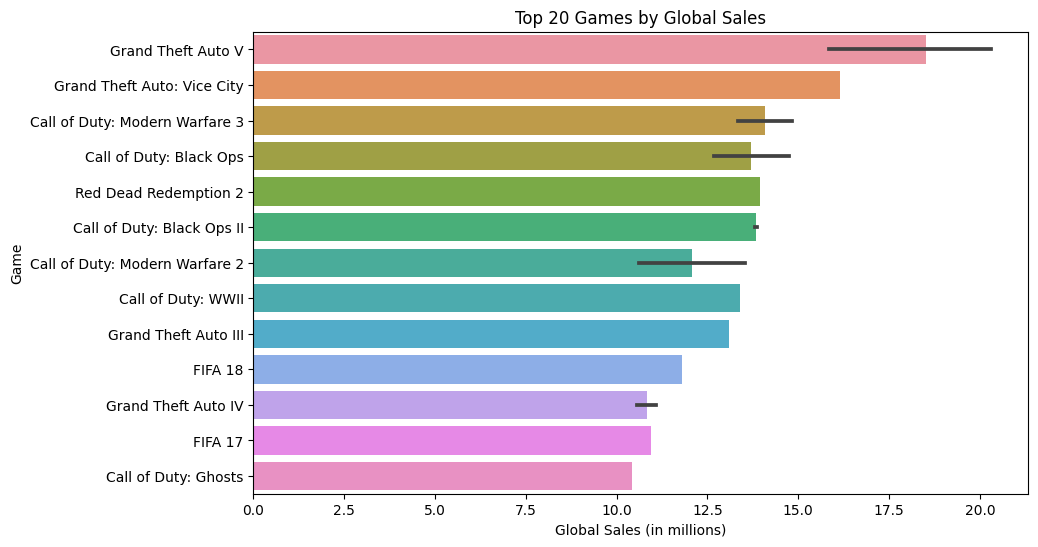

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="VG_Global_Sales", y="VG_Game", data=results_20)
plt.title("Top 20 Games by Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Game")
plt.show()


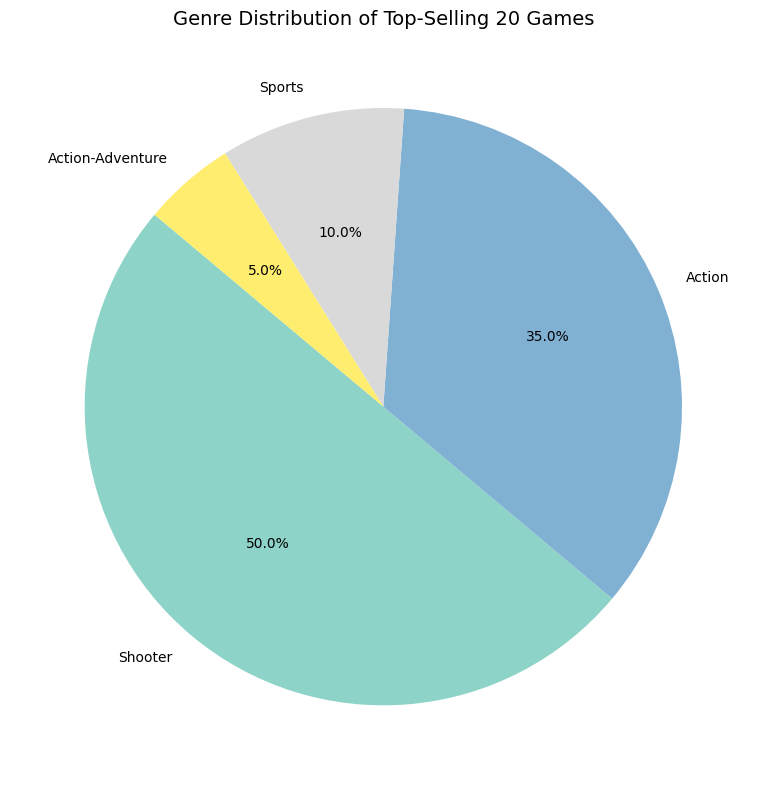

In [17]:
# Genre distribution
genre_distribution = results_20["VG_Genre"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
genre_distribution.plot.pie(autopct="%1.1f%%", startangle=140, colormap="Set3")
plt.title("Genre Distribution of Top-Selling 20 Games", fontsize=14)
plt.ylabel("")  # Remove default y-axis label
plt.tight_layout()
plt.show()


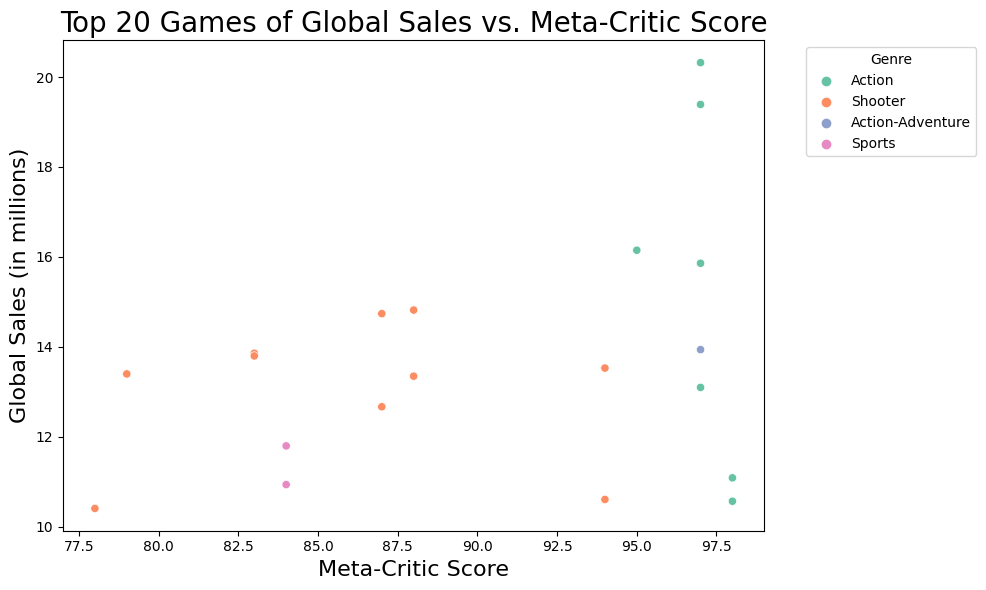

In [18]:
# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="MC_Score", y="VG_Global_Sales", data=results_20, hue="VG_Genre", palette="Set2")
plt.title("Top 20 Games of Global Sales vs. Meta-Critic Score", fontsize=20)
plt.xlabel("Meta-Critic Score", fontsize=16)
plt.ylabel("Global Sales (in millions)", fontsize=16)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

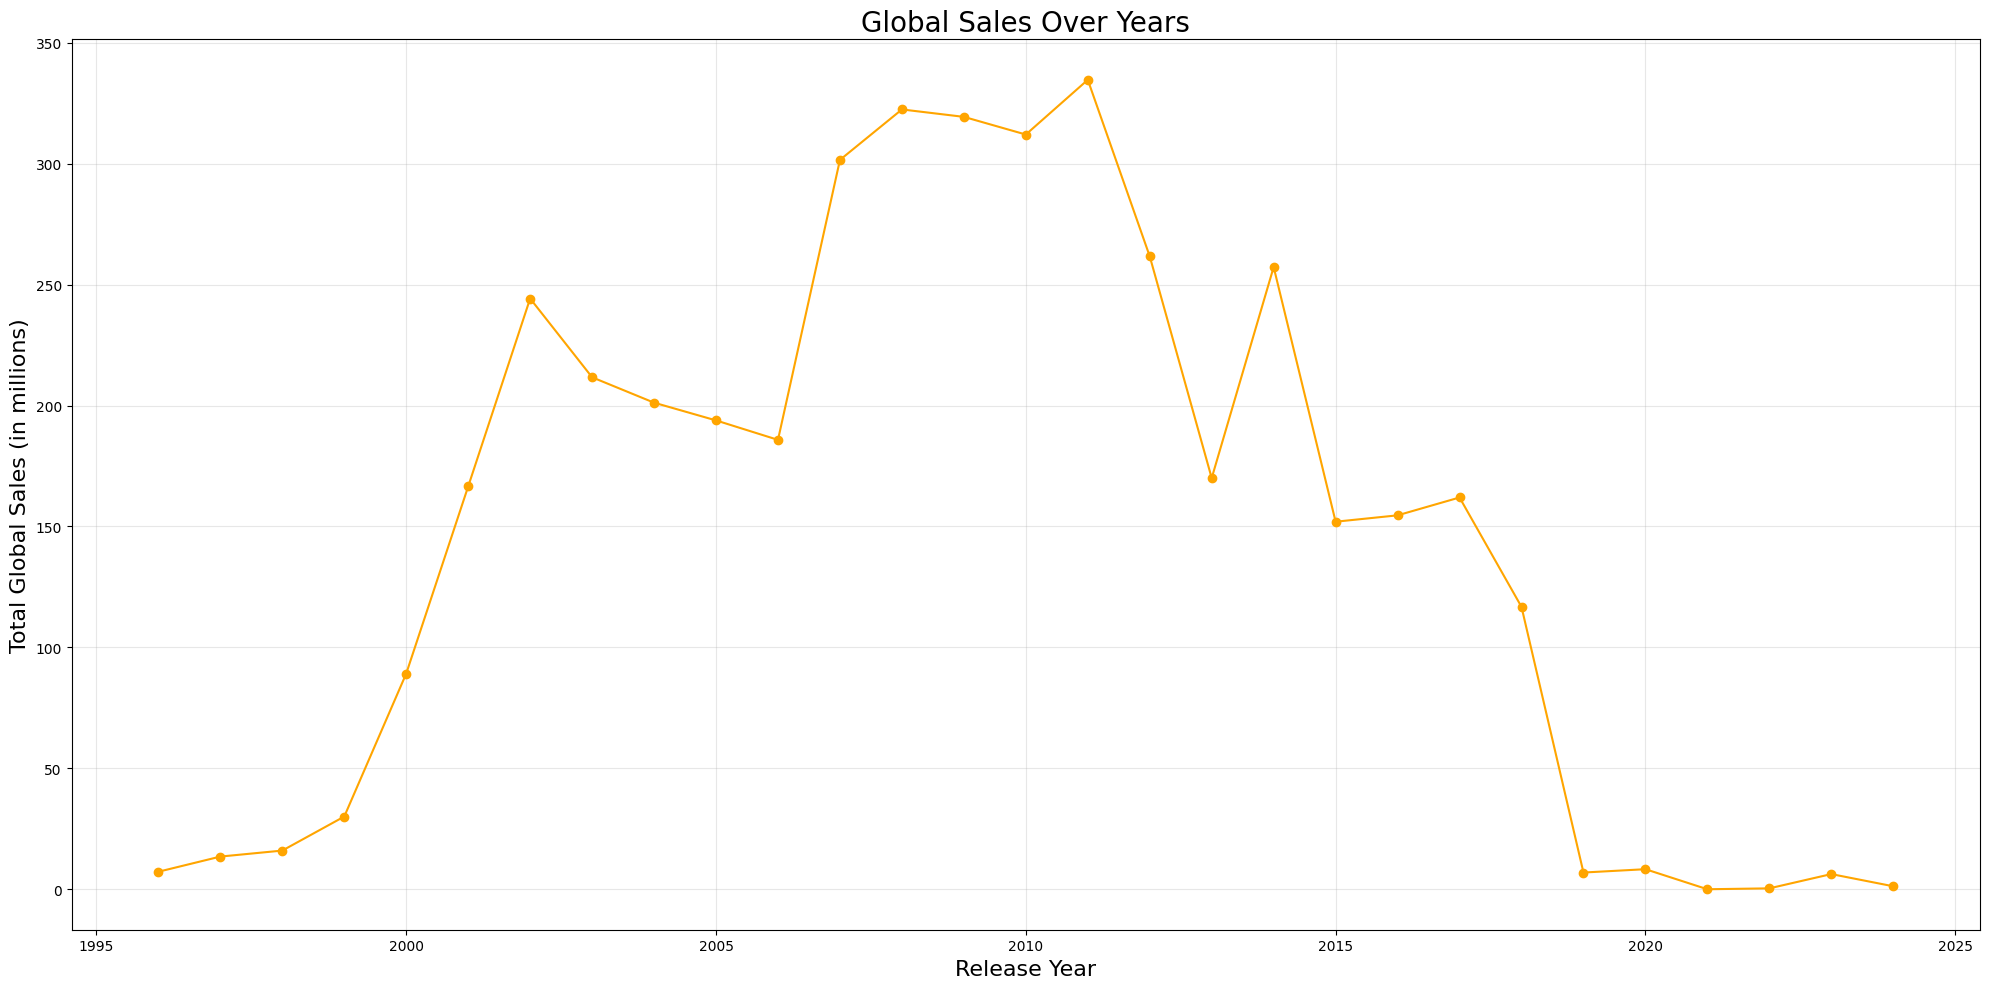

In [19]:
# Aggregate data by year
sales_by_year = results.groupby("MC_Year").agg({"VG_Global_Sales": "sum"}).reset_index()

# Plot the line chart
plt.figure(figsize=(20, 10))
plt.plot(sales_by_year["MC_Year"], sales_by_year["VG_Global_Sales"], marker="o", color="orange")
plt.title("Global Sales Over Years", fontsize=20)
plt.xlabel("Release Year", fontsize=16)
plt.ylabel("Total Global Sales (in millions)", fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Key Insights in BigQuery

<div>
    <h2>Analyzed the Relationship Between Twitch Streaming Popularity and Video Game Sales Using SQL and BigQuery</h2>
    <p><strong>Key findings include:</strong></p>
    <ul>
        <li><strong>Top-streamed games</strong> averaged <strong>2.98M units sold</strong>, significantly outperforming less-streamed games, which averaged only <strong>0.39M units sold</strong>.</li>
        <li><strong>Top-streamed games generated over 660% higher average sales</strong>, highlighting the strong influence of streaming popularity on consumer purchasing behavior.</li>
    </ul>
</div>


In [20]:
query_critic_sales = """
-- Calculate threshold for top 20% hours watched
WITH threshold_cte AS (
    SELECT 
        APPROX_QUANTILES(hours_watched, 100)[OFFSET(80)] AS top_20_threshold
    FROM `intricate-reef-442113-j1.gaming_data.twitch_game`
),
grouped_sales AS (
    SELECT 
        CASE 
            WHEN tg.hours_watched >= (SELECT top_20_threshold FROM threshold_cte) THEN 'Top Streamed'
            ELSE 'Less Streamed'
        END AS stream_category,
        AVG(vg.total_sales) AS avg_sales
    FROM `intricate-reef-442113-j1.gaming_data.gaming_sales` AS vg
    LEFT JOIN `intricate-reef-442113-j1.gaming_data.twitch_game` AS tg
    ON vg.title = tg.game
    GROUP BY stream_category
)
SELECT * FROM grouped_sales;
"""

query_job = client.query(query_critic_sales)
results = query_job.to_dataframe()
print(results)


  stream_category  avg_sales
0   Less Streamed   0.392470
1    Top Streamed   2.983634


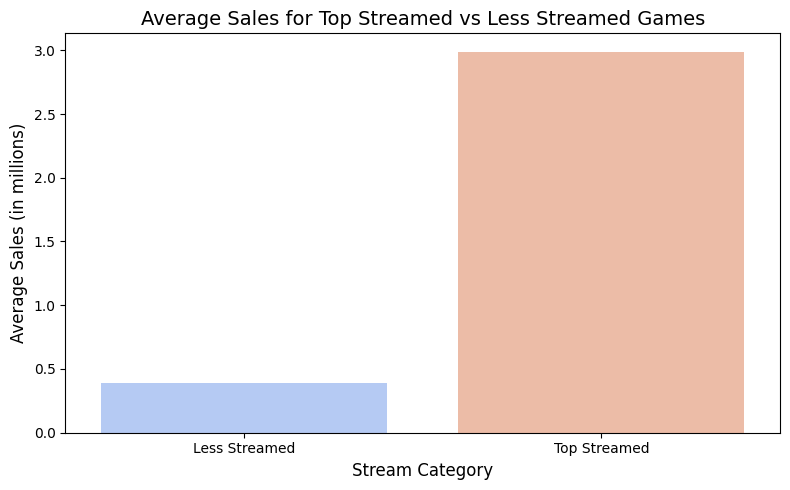

In [21]:
# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="stream_category", y="avg_sales", data=results, palette="coolwarm")
plt.title("Average Sales for Top Streamed vs Less Streamed Games", fontsize=14)
plt.xlabel("Stream Category", fontsize=12)
plt.ylabel("Average Sales (in millions)", fontsize=12)
plt.tight_layout()
plt.show()

<div>
    <h2>Analyzed Twitch Viewership Data Spanning 2019 to 2022 Using BigQuery</h2>
    <p><strong>Uncovering significant trends in gaming engagement. Key findings include:</strong></p>
    <ul>
        <li>A <strong>35.7% increase in total hours watched</strong> and a <strong>39.9% rise in average viewers</strong> during the first year of COVID-19 (2020).</li>
        <li>Continued growth in 2021, with a <strong>53.4% surge in total hours watched</strong> and a <strong>55.7% increase in average viewers</strong>, reflecting the sustained impact of pandemic-related behaviors.</li>
        <li>Stabilization in 2022, with a <strong>3.2% decline in total hours watched</strong> but a <strong>2.3% rise in average viewers</strong>, indicating a shift in viewer engagement patterns post-pandemic.</li>
    <div
</body>

In [22]:
query_twitch = """
SELECT 
    year AS release_year,
    COUNT(*) AS game_count,
    SUM(hours_watched) AS total_hours_watched,
    AVG(avg_viewers) AS avg_viewers,
    -- Calculate year-over-year percentage change for hours watched
    ((SUM(hours_watched) - LAG(SUM(hours_watched)) OVER (ORDER BY year)) / 
     LAG(SUM(hours_watched)) OVER (ORDER BY year)) * 100 AS year_on_year_change_hours,
    -- Calculate year-over-year percentage change for average viewers
    ((AVG(avg_viewers) - LAG(AVG(avg_viewers)) OVER (ORDER BY year)) / 
     LAG(AVG(avg_viewers)) OVER (ORDER BY year)) * 100 AS year_on_year_change_viewers
FROM `intricate-reef-442113-j1.gaming_data.twitch_game`
WHERE year BETWEEN 2019 AND 2022
GROUP BY year
ORDER BY year;
"""


query_job = client.query(query_twitch)
results = query_job.to_dataframe()
print(results)

   release_year  game_count  total_hours_watched  avg_viewers  \
0          2019         521           1332744669  3499.251440   
1          2020         503           1808442145  4893.948310   
2          2021         493           2774930147  7621.060852   
3          2022         468           2686027372  7794.339744   

   year_on_year_change_hours  year_on_year_change_viewers  
0                        NaN                          NaN  
1                  35.693069                    39.857006  
2                  53.443125                    55.724180  
3                  -3.203784                     2.273685  


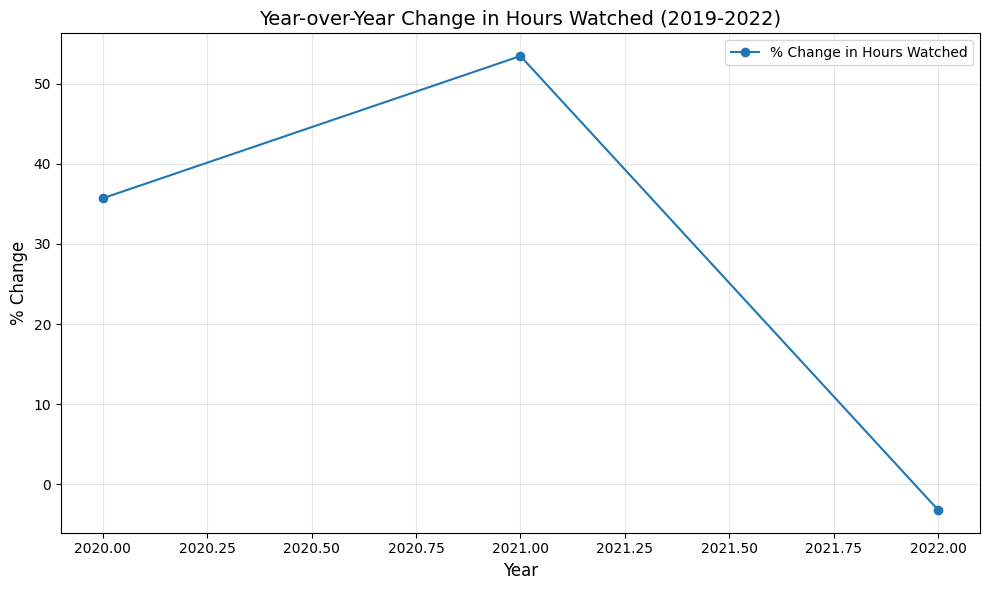

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(results['release_year'], results['year_on_year_change_hours'], marker='o', label='% Change in Hours Watched')
plt.title("Year-over-Year Change in Hours Watched (2019-2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("% Change", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

<h2>Correlation Analysis</h2>
<h2>Performed Correlation Analysis Using BigQuery</h2>
<p>
    Evaluated the relationship between Metacritic critic scores and global game sales. Found a 
    <strong>weak to moderate positive correlation (27.97%)</strong>, suggesting that 
    <strong>critical acclaim moderately impacts sales</strong>, with other factors also influencing 
    consumer behavior.
</p>

In [24]:
query_cor = """
WITH combined_data AS (
    SELECT 
        vg.title,
        vg.total_sales,
        mc.meta_critic_score
    FROM `intricate-reef-442113-j1.gaming_data.gaming_sales` AS vg
    FULL OUTER JOIN `intricate-reef-442113-j1.gaming_data.mc` AS mc
    ON LOWER(TRIM(vg.title)) = LOWER(TRIM(mc.title))
    WHERE vg.total_sales > 0.0 
      AND mc.meta_critic_score IS NOT NULL
)
SELECT 
    CORR(meta_critic_score, total_sales) AS correlation_score
FROM combined_data;
"""

query_job = client.query(query_cor)
results = query_job.to_dataframe()
print(results)

   correlation_score
0           0.279697


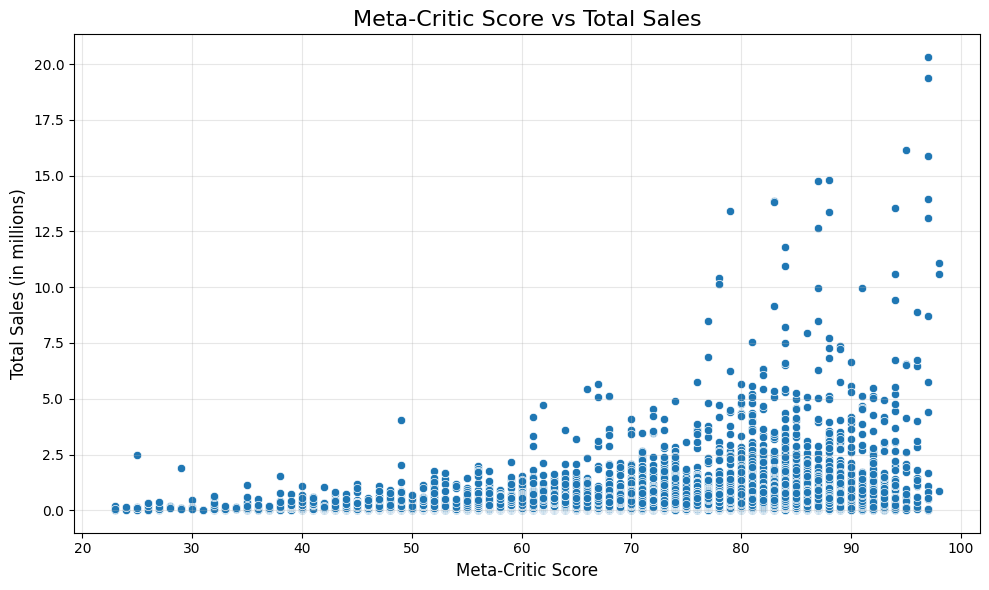

In [25]:
query_cor_pl = """
WITH combined_data AS (
    SELECT 
        vg.title,
        vg.total_sales,
        mc.meta_critic_score
    FROM `intricate-reef-442113-j1.gaming_data.gaming_sales` AS vg
    FULL OUTER JOIN `intricate-reef-442113-j1.gaming_data.mc` AS mc
    ON LOWER(TRIM(vg.title)) = LOWER(TRIM(mc.title))
    WHERE vg.total_sales > 0.0 
      AND mc.meta_critic_score IS NOT NULL
)
SELECT 
    meta_critic_score,
    total_sales
FROM combined_data;
"""

query_job = client.query(query_cor_pl)
scatter_data = query_job.to_dataframe()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="meta_critic_score", y="total_sales", data=scatter_data)
plt.title("Meta-Critic Score vs Total Sales", fontsize=16)
plt.xlabel("Meta-Critic Score", fontsize=12)
plt.ylabel("Total Sales (in millions)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()